In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
res = pd.read_csv('./sim0410/0410out.txt')

In [13]:
da = np.zeros((20,12))
with open('./sim041102/out.txt') as f:
    f.readline()
    for i,line in enumerate(f):
        ba = line.split(',')
        da[i] =ba[16:28] # Up to 16 are hyperparameters, after 28 are energy states.  

In [14]:
df = pd.DataFrame(da,columns=list(res.columns[16:]))

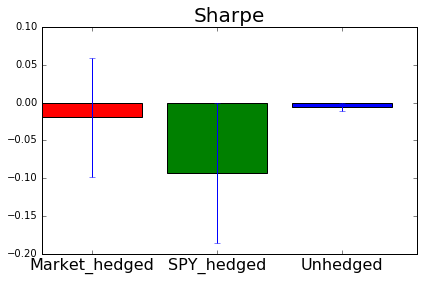

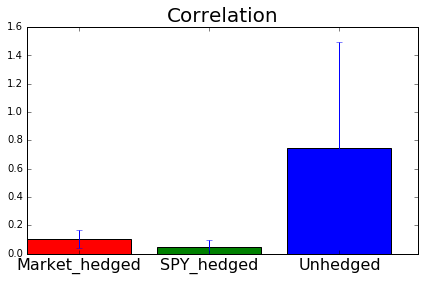

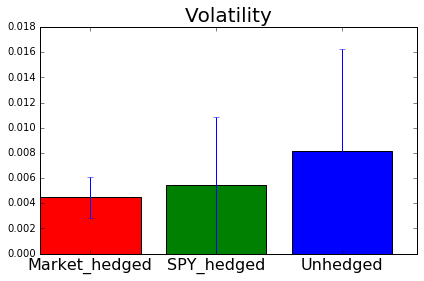

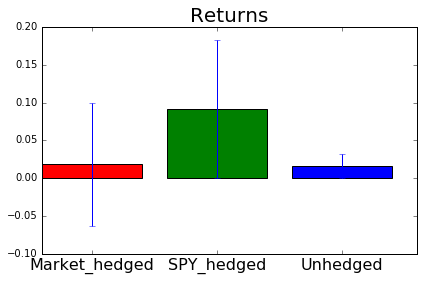

In [9]:
for metric in ['sharpe','correlation','volatility','returns']:
    market_hedged = df[metric+'_markethedged']
    spy_hedged = df[metric+'_sphedged']
    unhedged = df[metric+'_unhedged']
    
    market_mean = np.mean(market_hedged)
    spy_mean = np.mean(spy_hedged)
    un_mean = np.mean(unhedged)

    market_std = np.std(market_hedged)
    spy_std = np.mean(spy_hedged)
    un_std = np.mean(unhedged)


    
    plt.bar([0,1,2],[market_mean, spy_mean, un_mean], color=['r','g','b'],yerr=[market_std,spy_std,un_std])
    plt.xticks(np.array([0,1,2]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged'), fontsize = 16)

    plt.title(metric.capitalize(), fontsize=20)
    plt.tight_layout()
    plt.show()